En este trabajo práctico se busca hacer una clasificación de imágenes. En este caso las clases propuestas son:

*   Cat (Gato)
*   Dog (Perro)
*   Spider (Spider)

Se tiene dos sets:

*   Entrenamiento (1100 imágenes por clase)
*   Prueba (300 imágenes por clase)



*   Se le da acceso a Colab a acceder a Drive para importar el dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Se importan las librerías a utilizar



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt 
import os 
import random



*   Se descomprime el dataset



In [105]:
!unrar x "/content/drive/MyDrive/Colab Notebooks/Dataset.rar" 


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Colab Notebooks/Dataset.rar

Creating    Dataset                                                   OK
Creating    Dataset/Test                                              OK
Creating    Dataset/Test/cat                                          OK
Extracting  Dataset/Test/cat/1552.jpeg                                     0%  OK 
Extracting  Dataset/Test/cat/1553.jpeg                                     0%  OK 
Extracting  Dataset/Test/cat/1554.jpeg                                     0%  OK 
Extracting  Dataset/Test/cat/1555.jpeg                                     0%  OK 
Extracting  Dataset/Test/cat/1556.jpeg                                     0%  OK 
Extracting  Dataset/Test/cat/1558.jpeg                                     0%  OK 
Extracting  Dataset/Test/cat/1559.jpeg                                     0%  OK 


*   Se crea la clase que se usará para crear los datasets
*   Se crea el conjunto de etrenamiento y de test

In [117]:
img_size = (150, 150)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  #rotation_range = 45,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  validation_split = 0.05)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/Dataset/Train',
                                                target_size = img_size,
                                                batch_size = 32,
                                                class_mode = 'binary',
                                                subset = 'training')

validation_set = train_datagen.flow_from_directory('/content/Dataset/Train',
                                                target_size = img_size,
                                                batch_size = 32,
                                                class_mode = 'binary',
                                                subset = 'validation')

test_set = test_datagen.flow_from_directory('/content/Dataset/Test',
                                                target_size = img_size,
                                                batch_size = 1,
                                                class_mode = None,
                                                shuffle = False)

Found 3135 images belonging to 3 classes.
Found 165 images belonging to 3 classes.
Found 900 images belonging to 3 classes.




*   Se crea el modelo



In [119]:
model = tf.keras.models.Sequential([            
  tf.keras.layers.experimental.preprocessing.Resizing(img_size[0], img_size[1], interpolation='bilinear'),                          
  tf.keras.layers.Conv2D(6, (6, 6), activation='relu', input_shape=(img_size[0], img_size[1], 3)),                              
  tf.keras.layers.Conv2D(12, (5, 5), strides=(2, 2), activation='relu'),        
  tf.keras.layers.Conv2D(24, (4, 4), strides=(2, 2), activation='relu'),        
  tf.keras.layers.Flatten(),                                                    
  tf.keras.layers.Dropout(rate=.25),                                            
  tf.keras.layers.Dense(200, activation='relu'),                                
  tf.keras.layers.Dense(3, activation='softmax')                               
])                                                                              
                                                                                
optimizer = tf.keras.optimizers.Adam(decay=.0001)                               
                                                                                
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



*   Se entrena el  modelo en el conjunto de entrenamiento



In [120]:
model.fit(training_set, epochs = 35)


Epoch 1/35
98/98 [==============================] - 45s 228ms/step - loss: 1.0456 - accuracy: 0.4456
Epoch 2/35
98/98 [==============================] - 21s 212ms/step - loss: 0.9250 - accuracy: 0.5410
Epoch 3/35
98/98 [==============================] - 21s 211ms/step - loss: 0.8738 - accuracy: 0.5764
Epoch 4/35
98/98 [==============================] - 22s 227ms/step - loss: 0.8437 - accuracy: 0.6061
Epoch 5/35
98/98 [==============================] - 21s 212ms/step - loss: 0.7988 - accuracy: 0.6159
Epoch 6/35
98/98 [==============================] - 21s 212ms/step - loss: 0.7877 - accuracy: 0.6364
Epoch 7/35
98/98 [==============================] - 21s 213ms/step - loss: 0.7484 - accuracy: 0.6609
Epoch 8/35
98/98 [==============================] - 23s 231ms/step - loss: 0.7425 - accuracy: 0.6625
Epoch 9/35
98/98 [==============================] - 21s 213ms/step - loss: 0.7241 - accuracy: 0.6759
Epoch 10/35
98/98 [==============================] - 21s 212ms/step - loss: 0.6782 - accura



*   Se evalúa el modelo en el conjunto de validación



In [121]:
score = model.evaluate(validation_set)

6/6 [==============================] - 1s 157ms/step - loss: 0.6048 - accuracy: 0.8000




*   Resultados del modelo entrenado



In [122]:
model.summary()

print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_15 (Resizing)      (None, 150, 150, None)    0         
                                                                 
 conv2d_57 (Conv2D)          (None, 145, 145, 6)       654       
                                                                 
 conv2d_58 (Conv2D)          (None, 71, 71, 12)        1812      
                                                                 
 conv2d_59 (Conv2D)          (None, 34, 34, 24)        4632      
                                                                 
 flatten_19 (Flatten)        (None, 27744)             0         
                                                                 
 dropout_19 (Dropout)        (None, 27744)             0         
                                                                 
 dense_38 (Dense)            (None, 200)             

Exportar e importar el modelo entrenado

In [ ]:
#model.save('/content/drive/MyDrive/models/model.h5')

In [ ]:
#model = tf.keras.models.load_model('/content/drive/MyDrive/models/model.h5')



*   Se prueba el modelo con algunas imágenes del conjunto de test



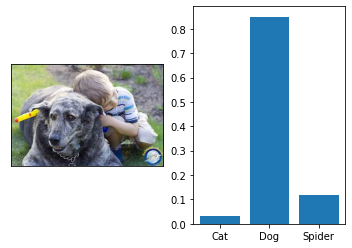

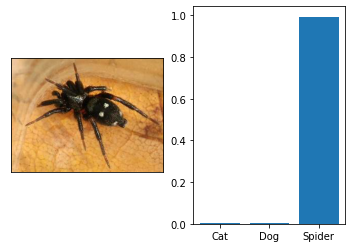

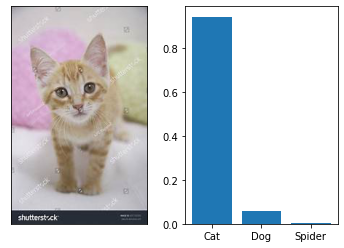

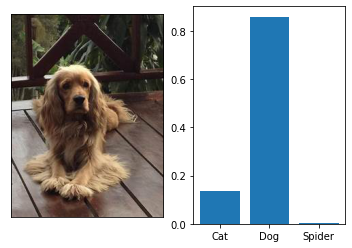

In [158]:
path = "/content/Dataset/Test"
dir_prueba = os.listdir(path)
fname = test_set.filenames

for i in range(4):
  ran = random.randrange(0,len(fname))
  pred = model.predict(test_set[ran])[0]

  fig = plt.figure()
  ax1 = fig.add_subplot(1, 2, 1)

  img = plt.imread(os.path.join(path, fname[ran]))
  ax1.imshow(img)
  ax1.set_xticks([])
  ax1.set_yticks([])

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.bar(['Cat', 'Dog', 'Spider'], pred)
  plt.show()